In [89]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [93]:
file = "ACAD.xlsx"
df = pd.read_excel(file)
park = file[0:4]

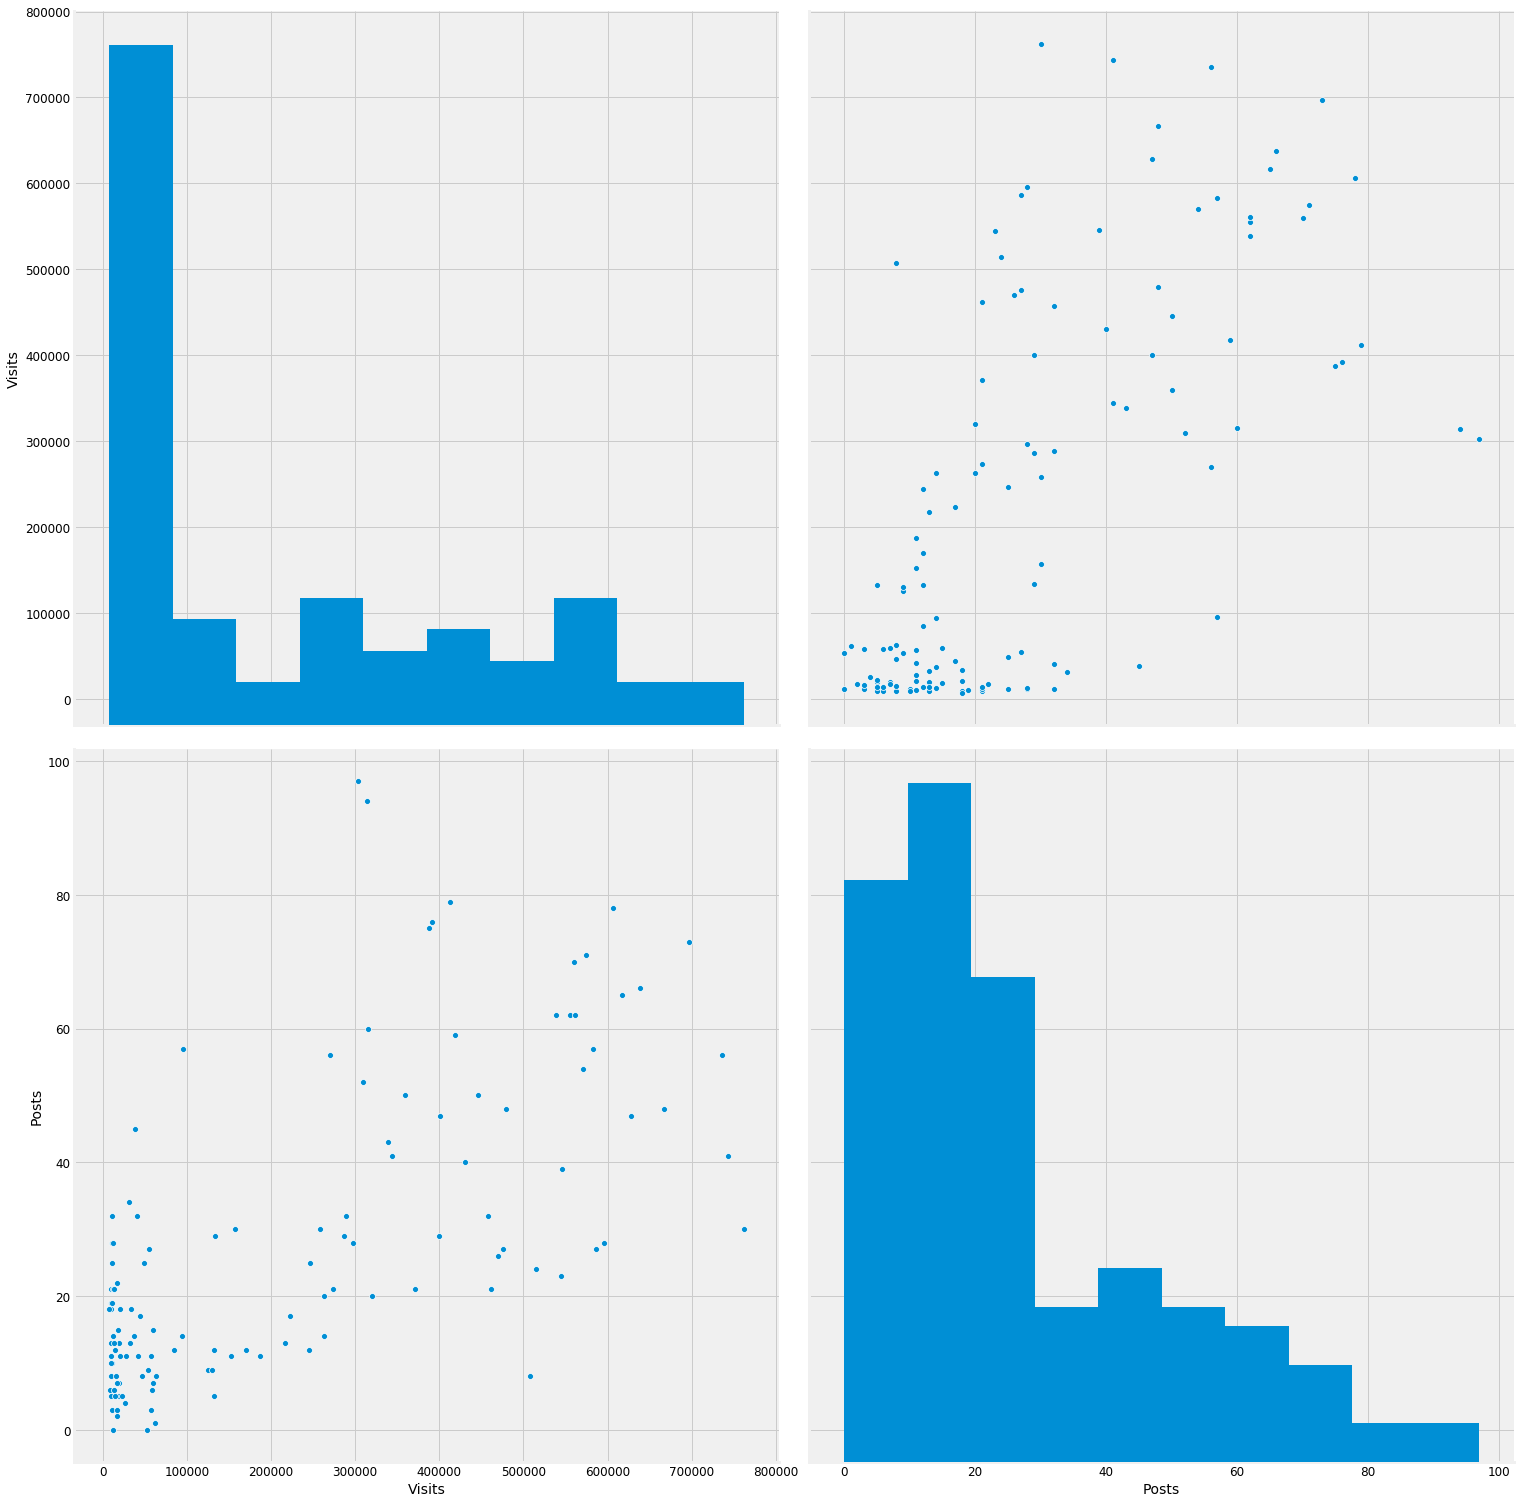

In [96]:
sns_plot = sns.pairplot(df, size=10.5)
sns_plot.savefig(park + "_Pairplot.png")

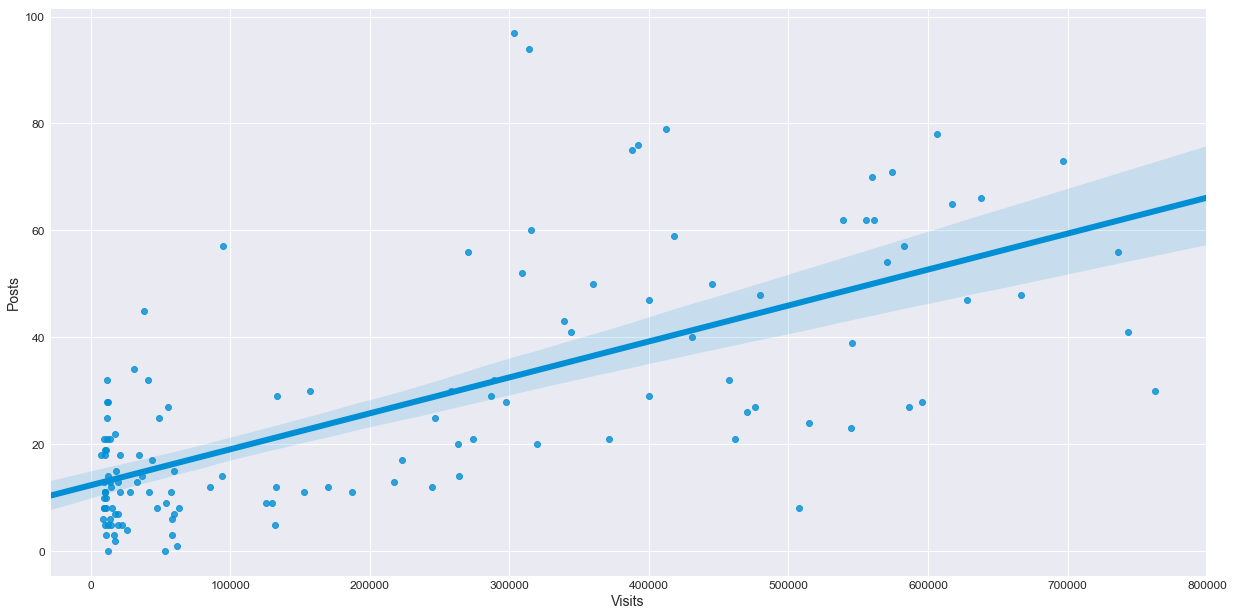

In [117]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns_plot = sns.regplot(x="Visits", y="Posts", data=df)
sns_plot.figure.savefig(park + "_REGplot.png")

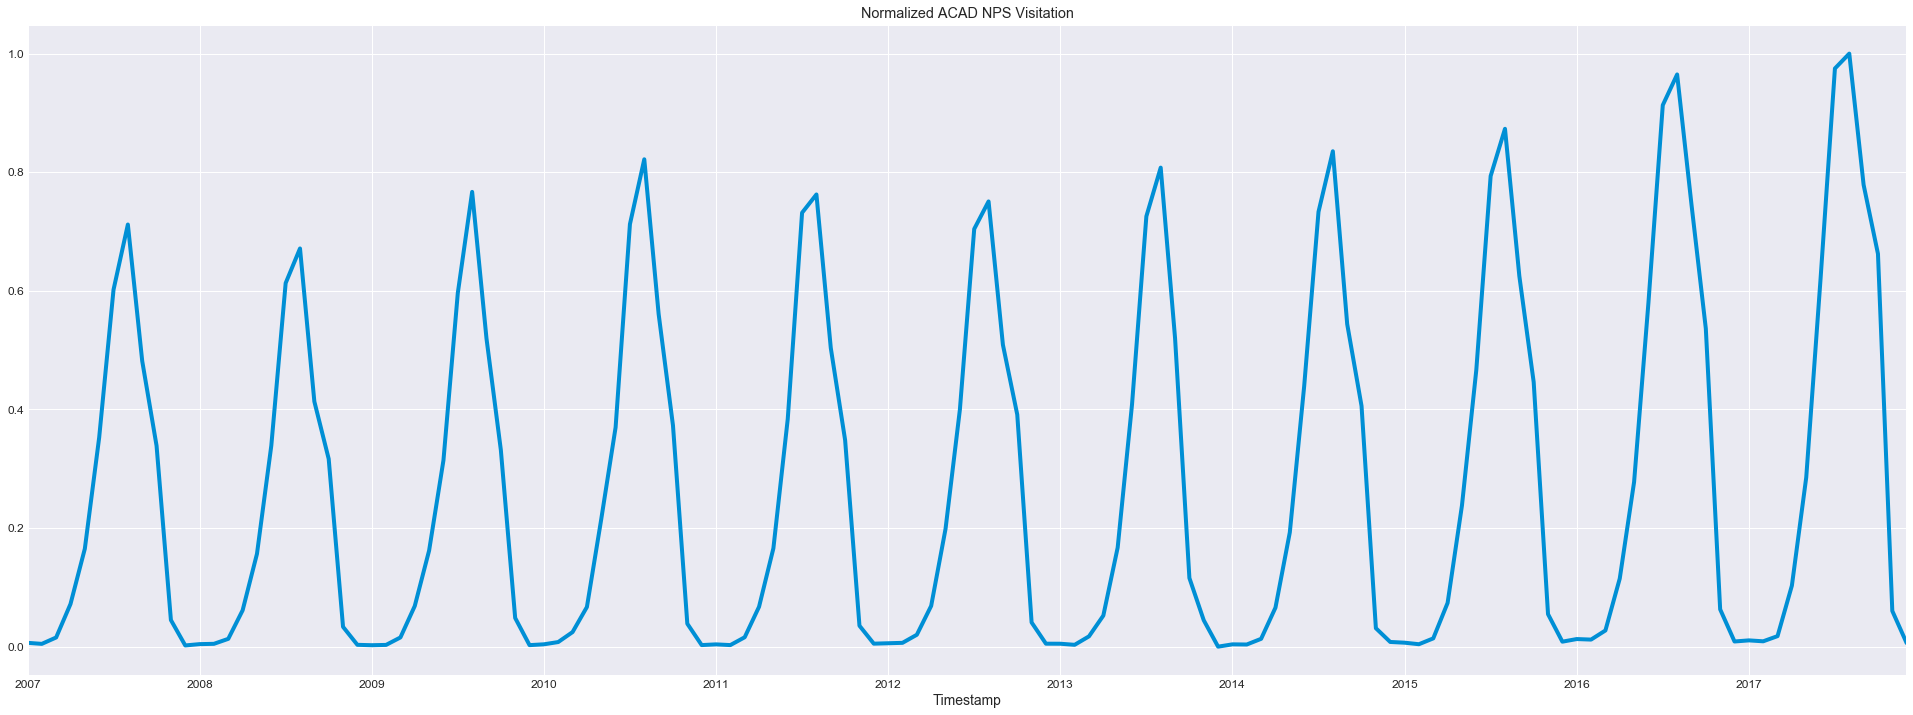

In [118]:
scaler = MinMaxScaler()
data = df[['Visits','Posts']]
scaler.fit(data)
df[['Visits','Posts']] = scaler.transform(data)
df = df.set_index('Timestamp')
df.index
v = df['Visits']
fig = plt.figure(figsize=(30, 12))
v.plot()
plt.title('Normalized ' + park + ' NPS Visitation')

#fig.plot(range(10)) #plot example
plt.show() #for control

fig.savefig('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Visits.png', dpi=fig.dpi)

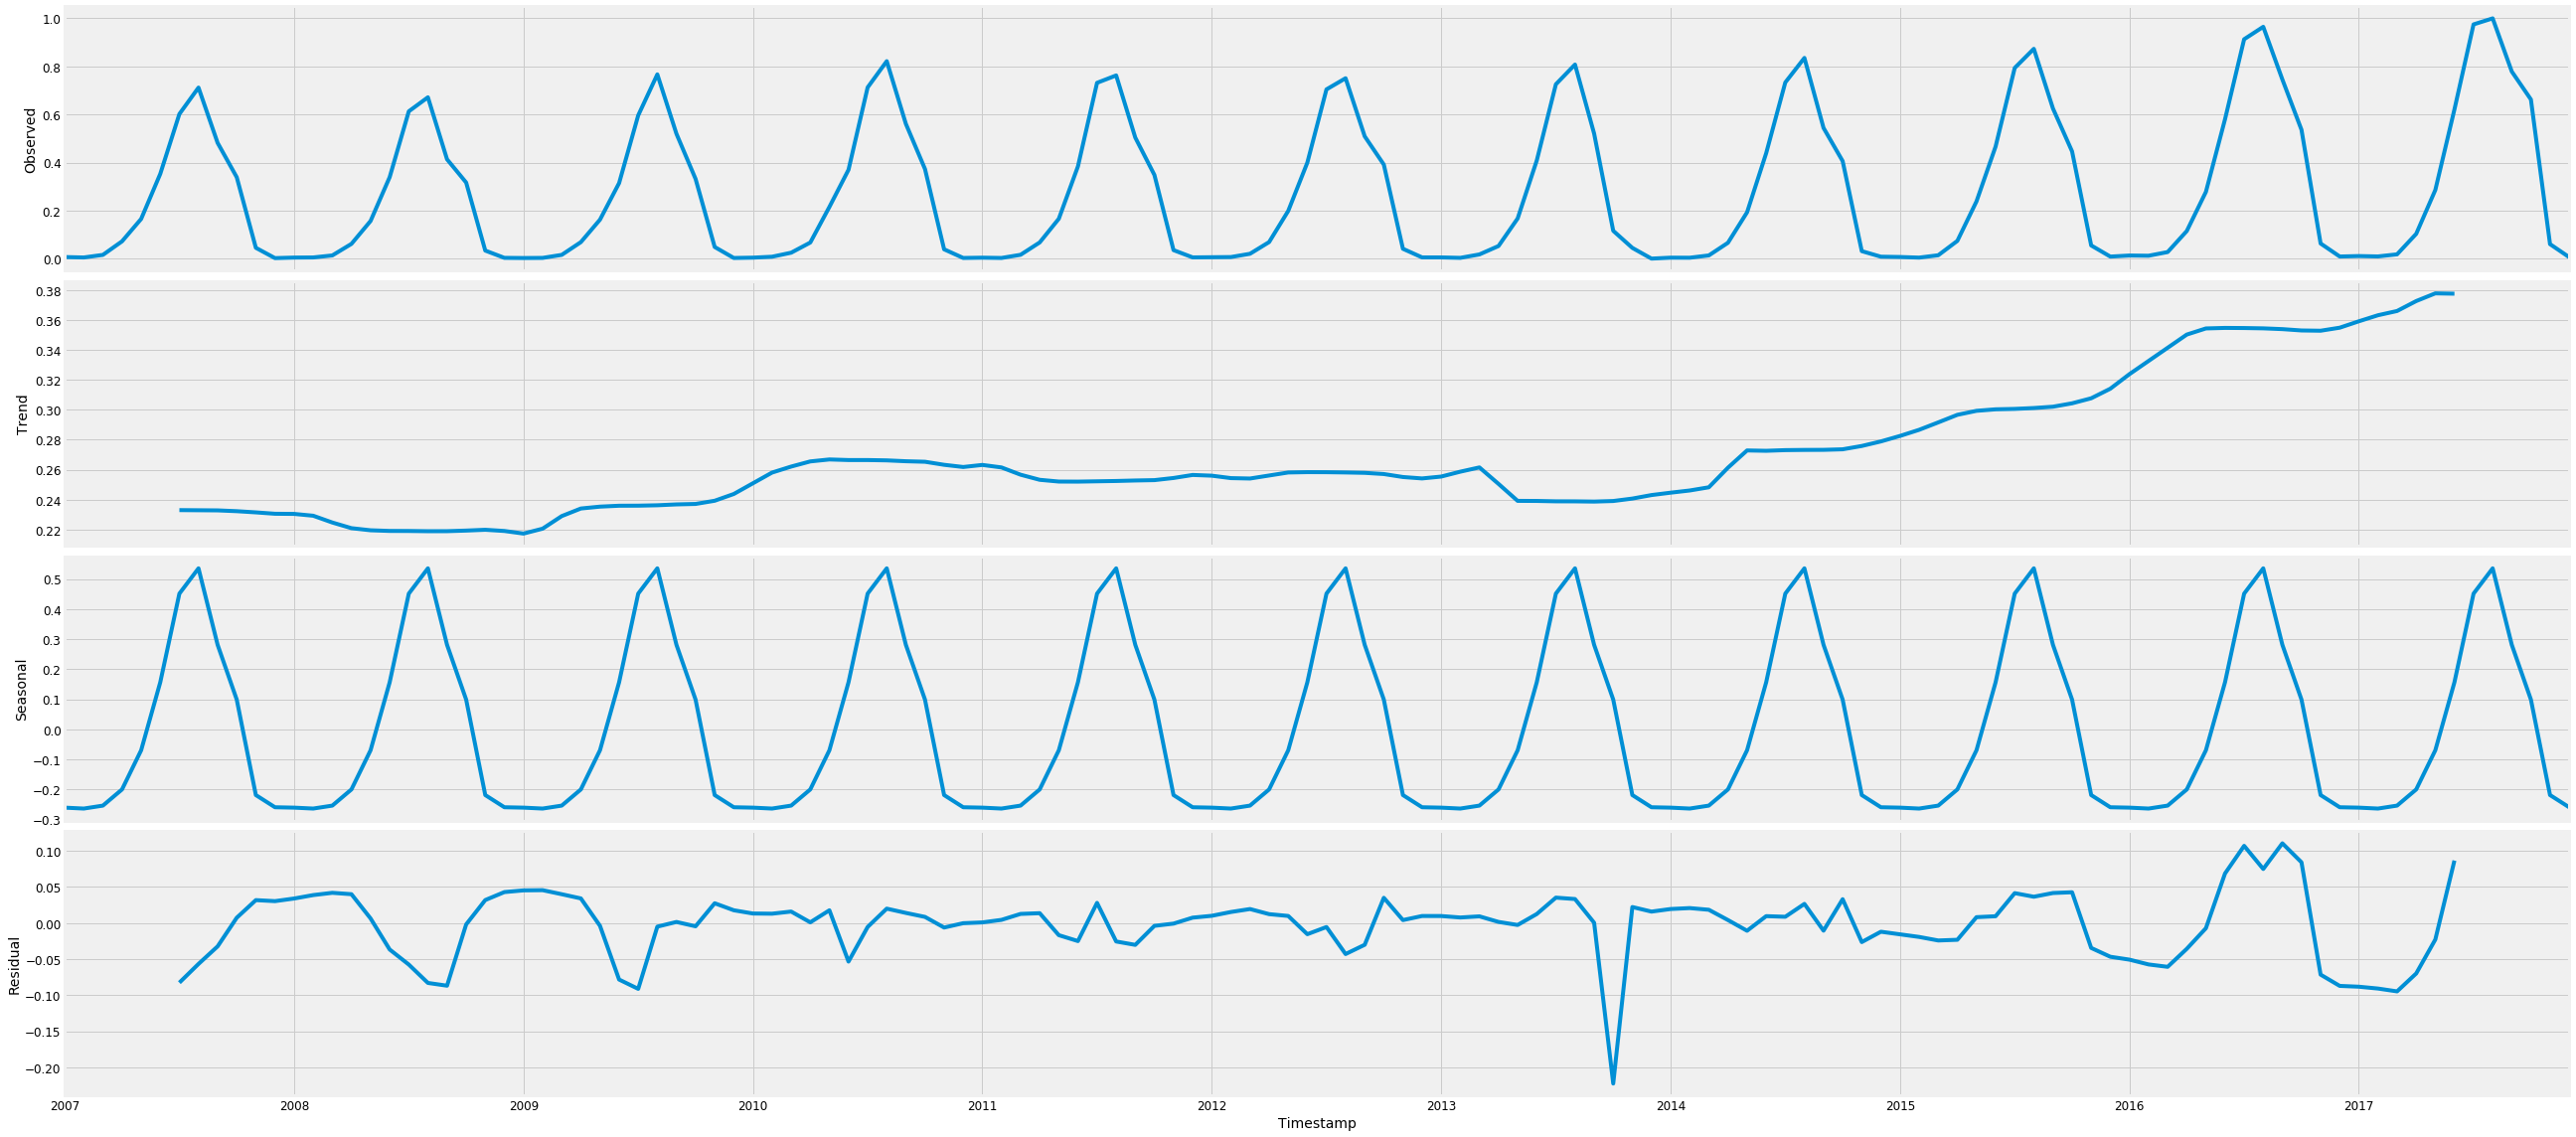

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 36, 16
decomposition = sm.tsa.seasonal_decompose(v, model='additive')
fig = decomposition.plot()

plt.show()

fig.savefig('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Visits_Decomposition.png', dpi=fig.dpi)

In [40]:
mod_v = sm.tsa.statespace.SARIMAX(v,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
v_results = mod_v.fit()
print(v_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3360      0.101      3.311      0.001       0.137       0.535
ma.L1         -0.9380      0.057    -16.402      0.000      -1.050      -0.826
ar.S.L12      -0.3751      0.043     -8.654      0.000      -0.460      -0.290
sigma2         0.0023      0.000     14.729      0.000       0.002       0.003


In [48]:
f = open('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Visits_Model_Summary.csv','w')
f.write(v_results.summary().as_csv())
f.close()

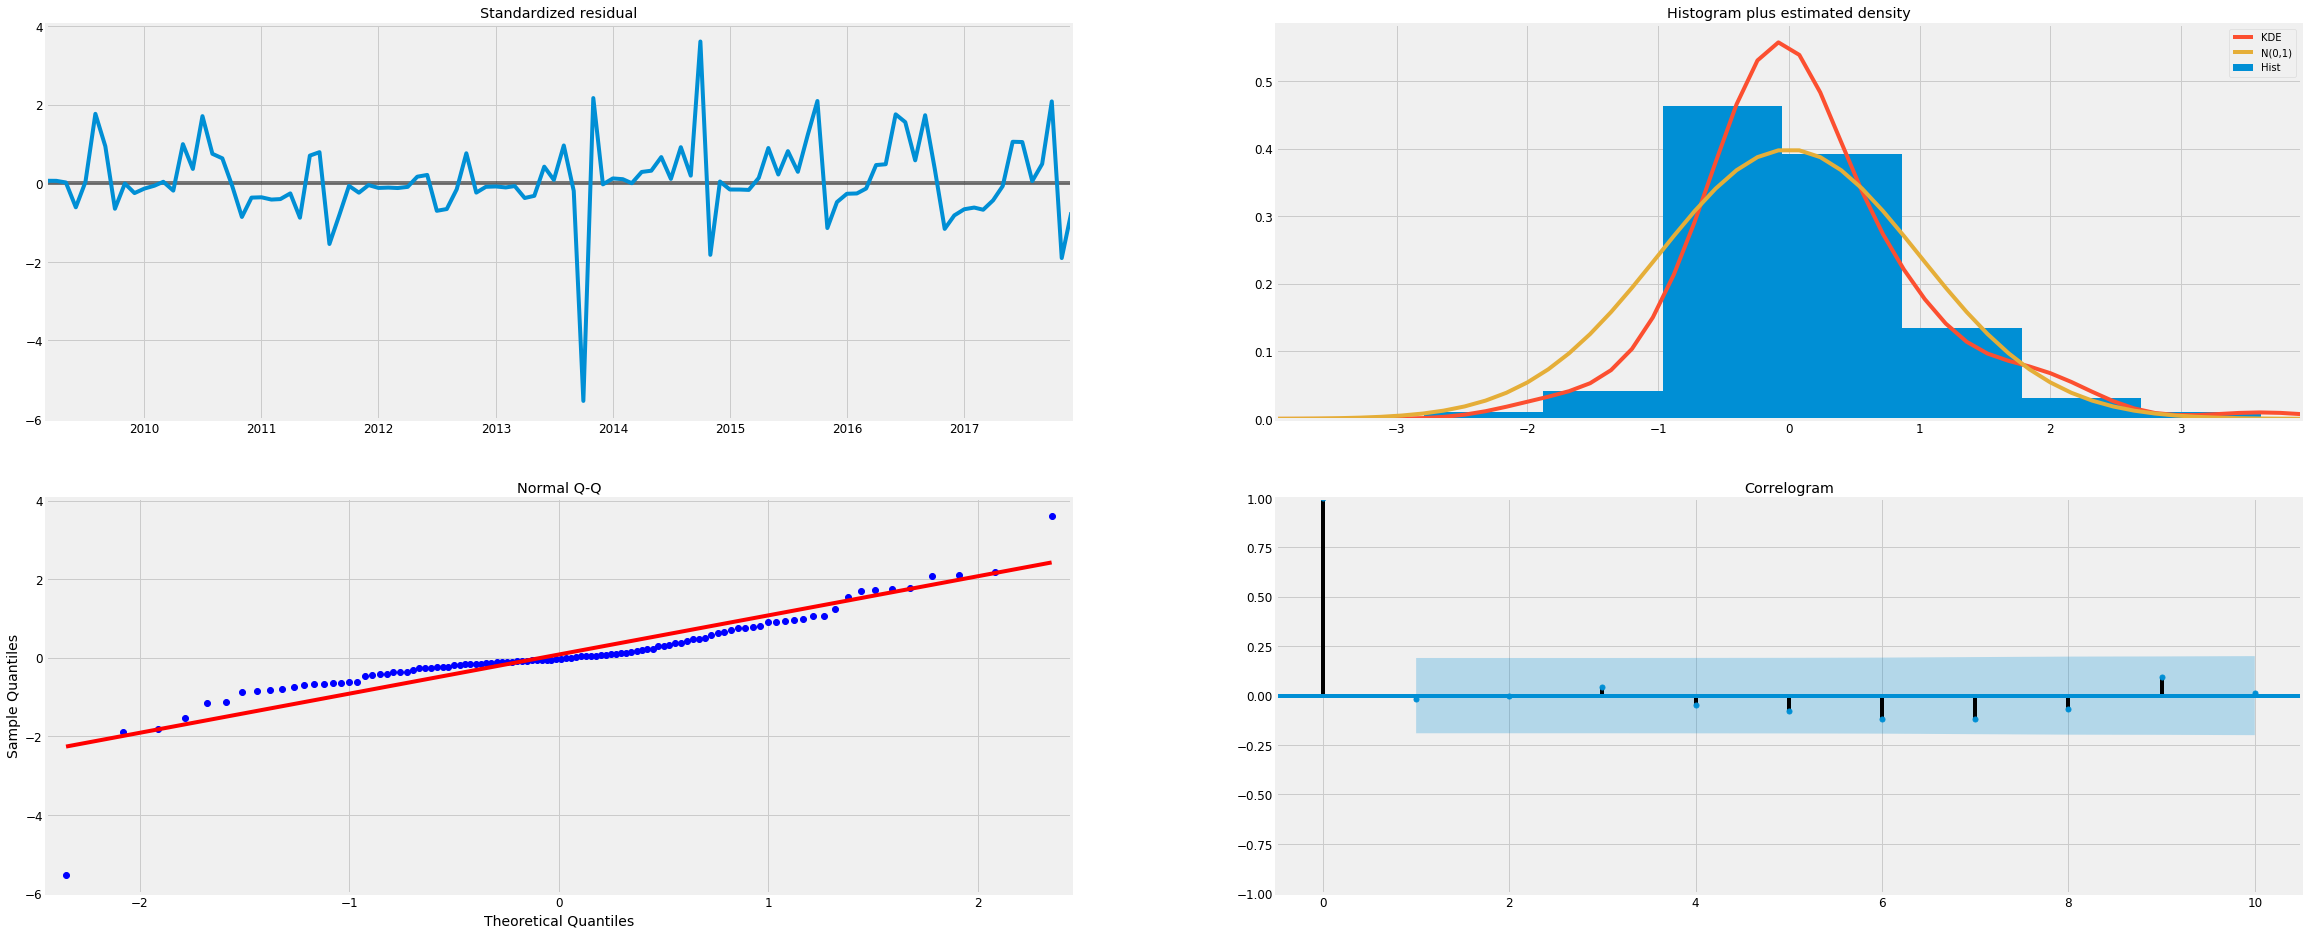

In [22]:
fig = v_results.plot_diagnostics(figsize=(36, 16))

plt.show()

fig.savefig('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Visits_Diagnostics.png', dpi=fig.dpi)

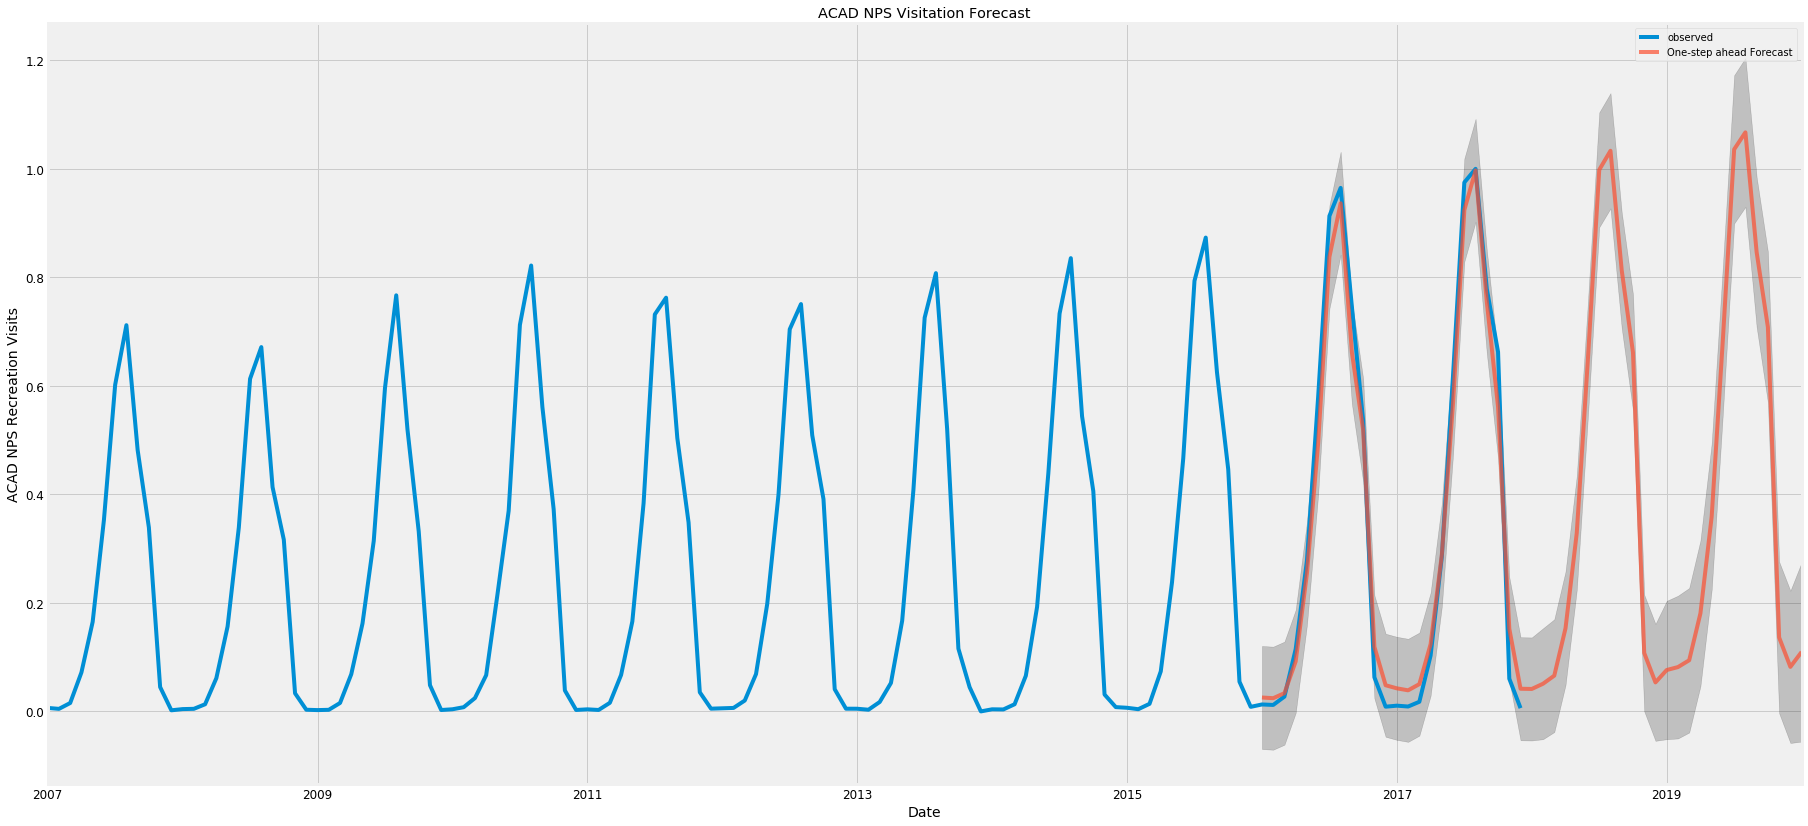

In [63]:
pred_v = v_results.get_prediction(start=pd.to_datetime('2016-01-01'), end=pd.to_datetime('2020-01-01'),dynamic=False)
pred_v_ci = pred_v.conf_int()

fig = matplotlib.pyplot.figure()

ax = fig.add_subplot(v['2006':].plot(label='observed'))
pred_v.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(28, 14))
ax.fill_between(pred_v_ci.index,
                 pred_v_ci.iloc[:, 0],
                 pred_v_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel(park + ' NPS Recreation Visits')
plt.title(park + " NPS Visitation Forecast")
plt.legend()
plt.show()

fig.savefig('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Visits_One_Step_Forecast.png', dpi=fig.dpi)

In [49]:
v_forecasted = pred_v.predicted_mean
v_truth = v['2016-01-01':]
mse_v = ((v_forecasted - v_truth) ** 2).mean()

f = open('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Visits_RMSE.txt','w')
f.write('The Mean Squared Error of our Visits forecasts is {}'.format(round(mse_v, 7)) + '\n' +
'The Root Mean Squared Error of our Visits forecasts is {}'.format(round(np.sqrt(mse_v), 7)))
f.close()

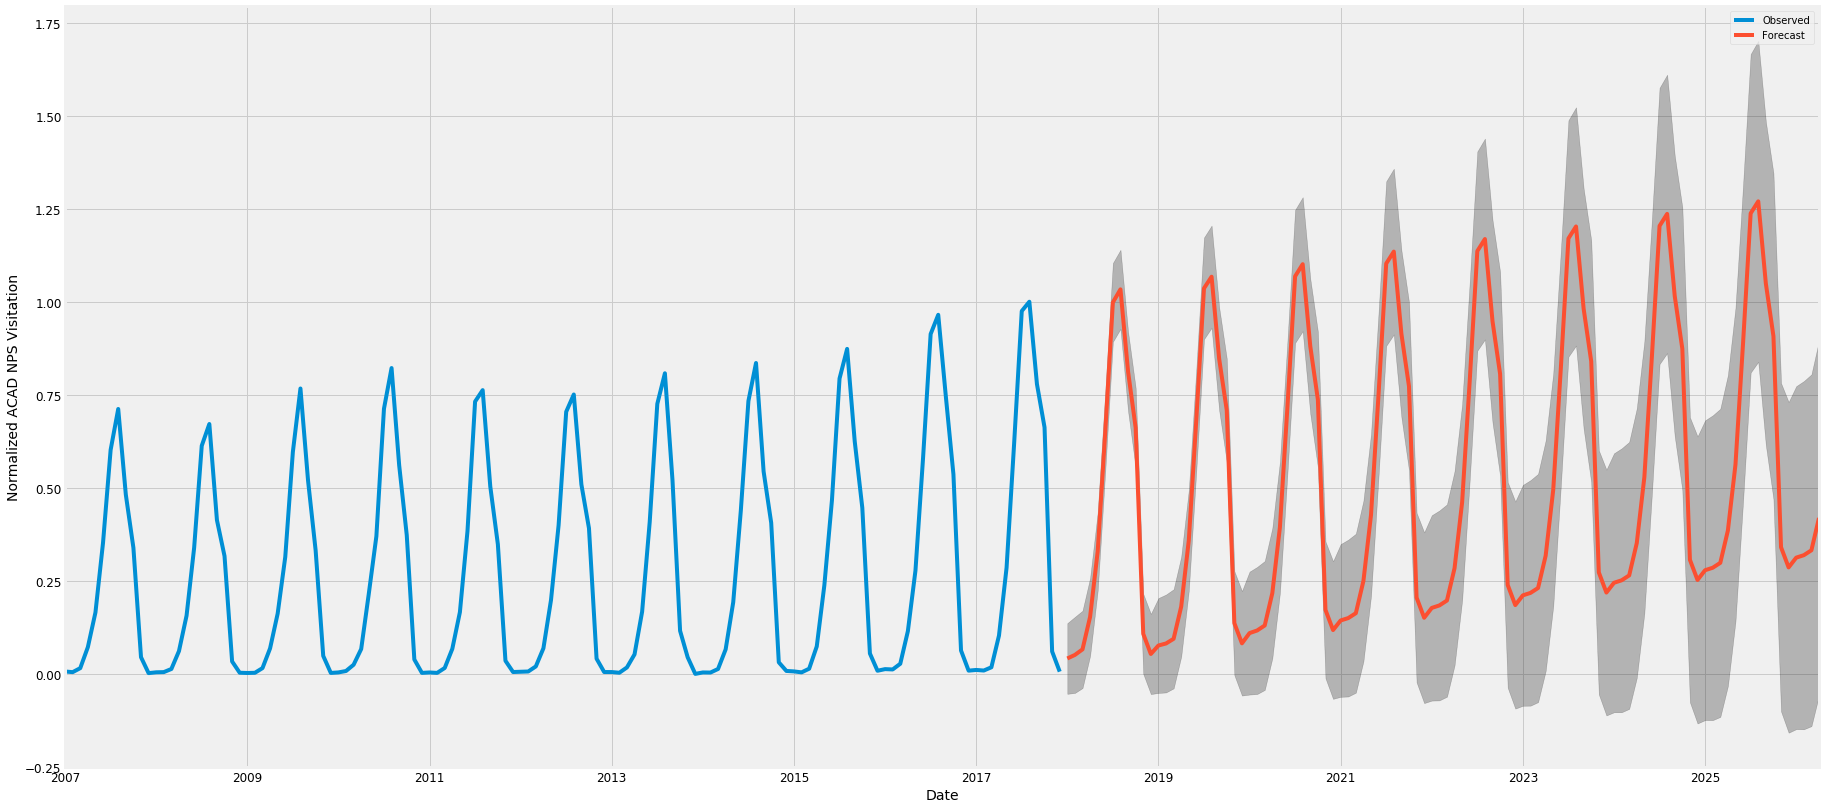

In [69]:
pred_v_uc = v_results.get_forecast(steps=100)
pred_v_ci = pred_v_uc.conf_int()

fig = matplotlib.pyplot.figure()
ax = v.plot(label='Observed', figsize=(28, 14))
pred_v_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_v_ci.index,
                pred_v_ci.iloc[:, 0],
                pred_v_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Normalized ' + park + ' NPS Visitation')
plt.legend()
plt.show()
fig.savefig('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Visits_OneHundred_Step_Forecast.png', dpi=fig.dpi)

## Flickr Posts

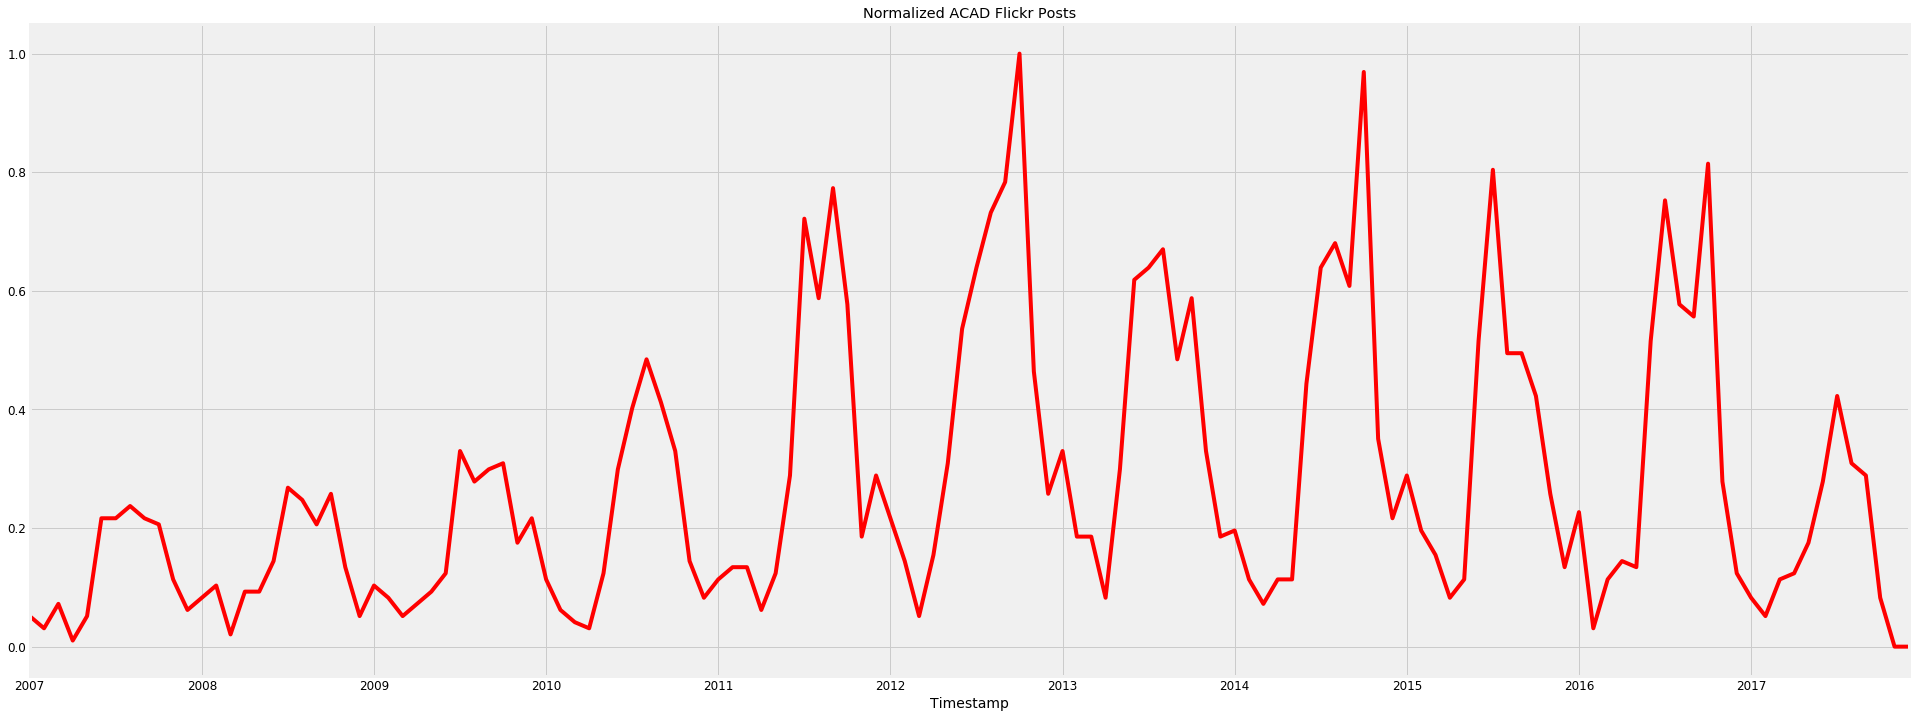

In [54]:
p = df['Posts']
fig = matplotlib.pyplot.figure()
p.plot(figsize=(30, 12), color='red')
plt.title('Normalized ' + park + ' Flickr Posts')
plt.show()
fig.savefig('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Posts.png', dpi=fig.dpi)

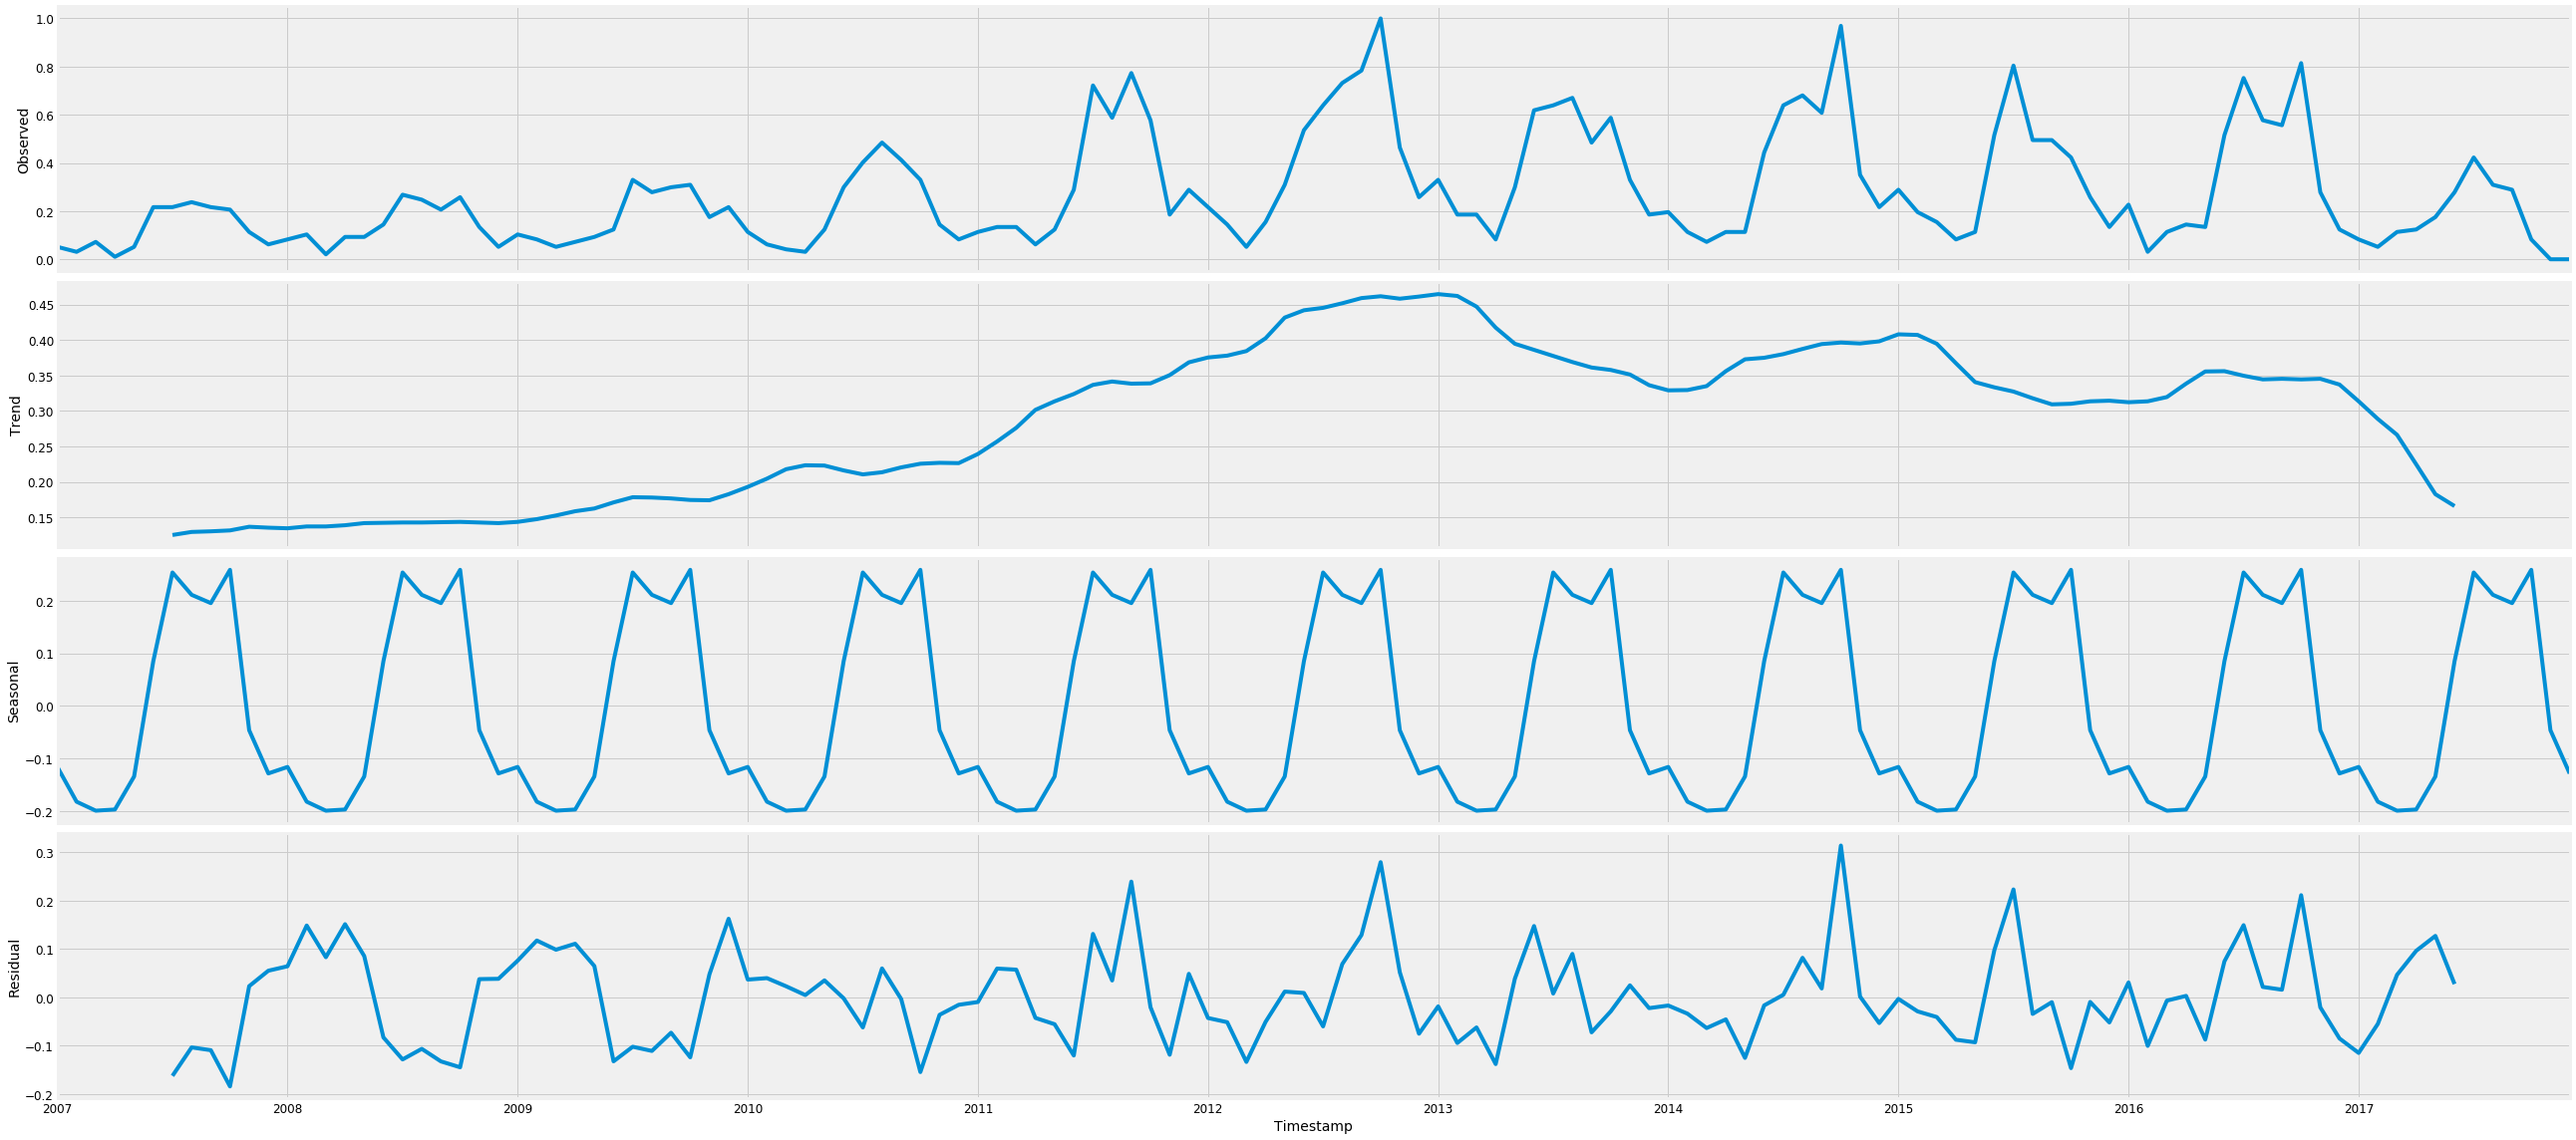

In [55]:
from pylab import rcParams
rcParams['figure.figsize'] = 36, 16
decomposition = sm.tsa.seasonal_decompose(p, model='additive')
fig = decomposition.plot()
plt.show()
fig.savefig('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Posts_Decomposition.png', dpi=fig.dpi)

In [56]:
mod_p = sm.tsa.statespace.SARIMAX(p,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
p_results = mod_p.fit()
print(p_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3841      0.157      2.444      0.015       0.076       0.692
ma.L1         -0.8590      0.087     -9.873      0.000      -1.030      -0.688
ar.S.L12      -0.6983      0.073     -9.626      0.000      -0.840      -0.556
sigma2         0.0133      0.002      8.855      0.000       0.010       0.016


In [57]:
f = open('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Posts_Model_Summary.csv','w')
f.write(p_results.summary().as_csv())
f.close()

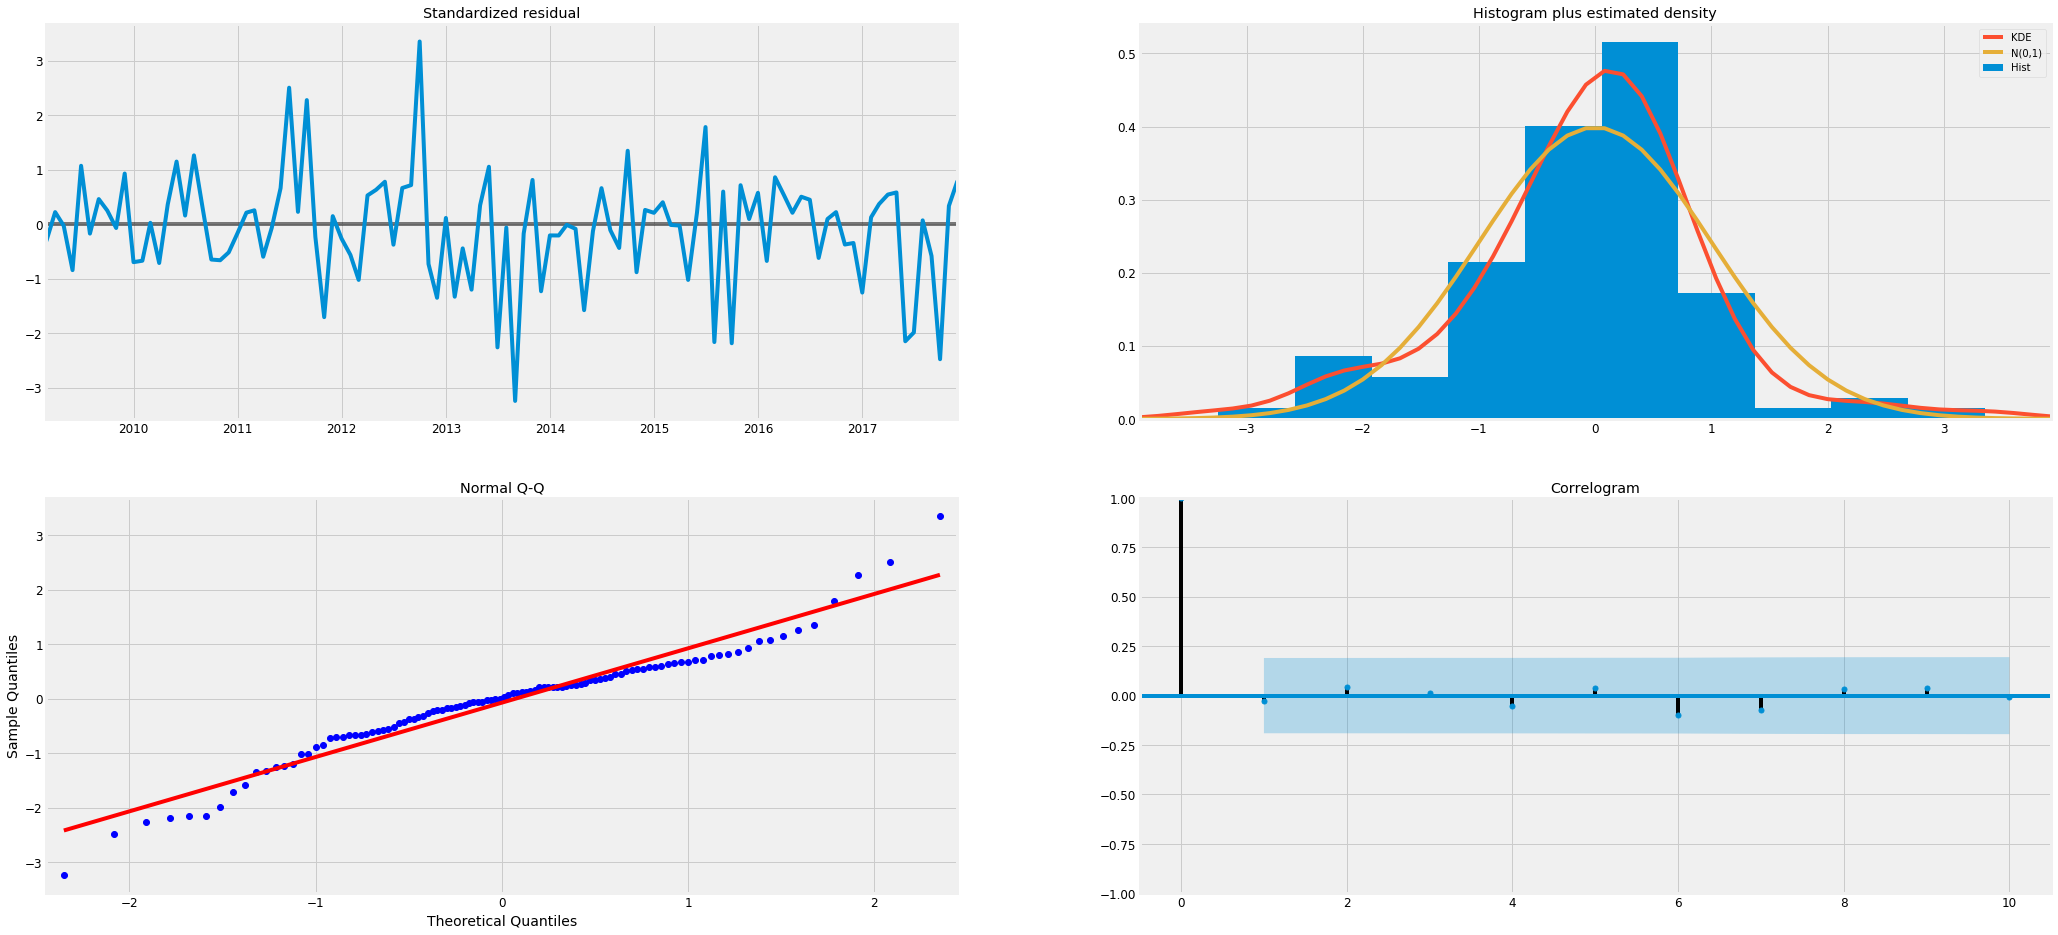

In [59]:
fig = p_results.plot_diagnostics(figsize=(32, 16))
plt.show()
fig.savefig('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Posts_Diagnostics.png', dpi=fig.dpi)

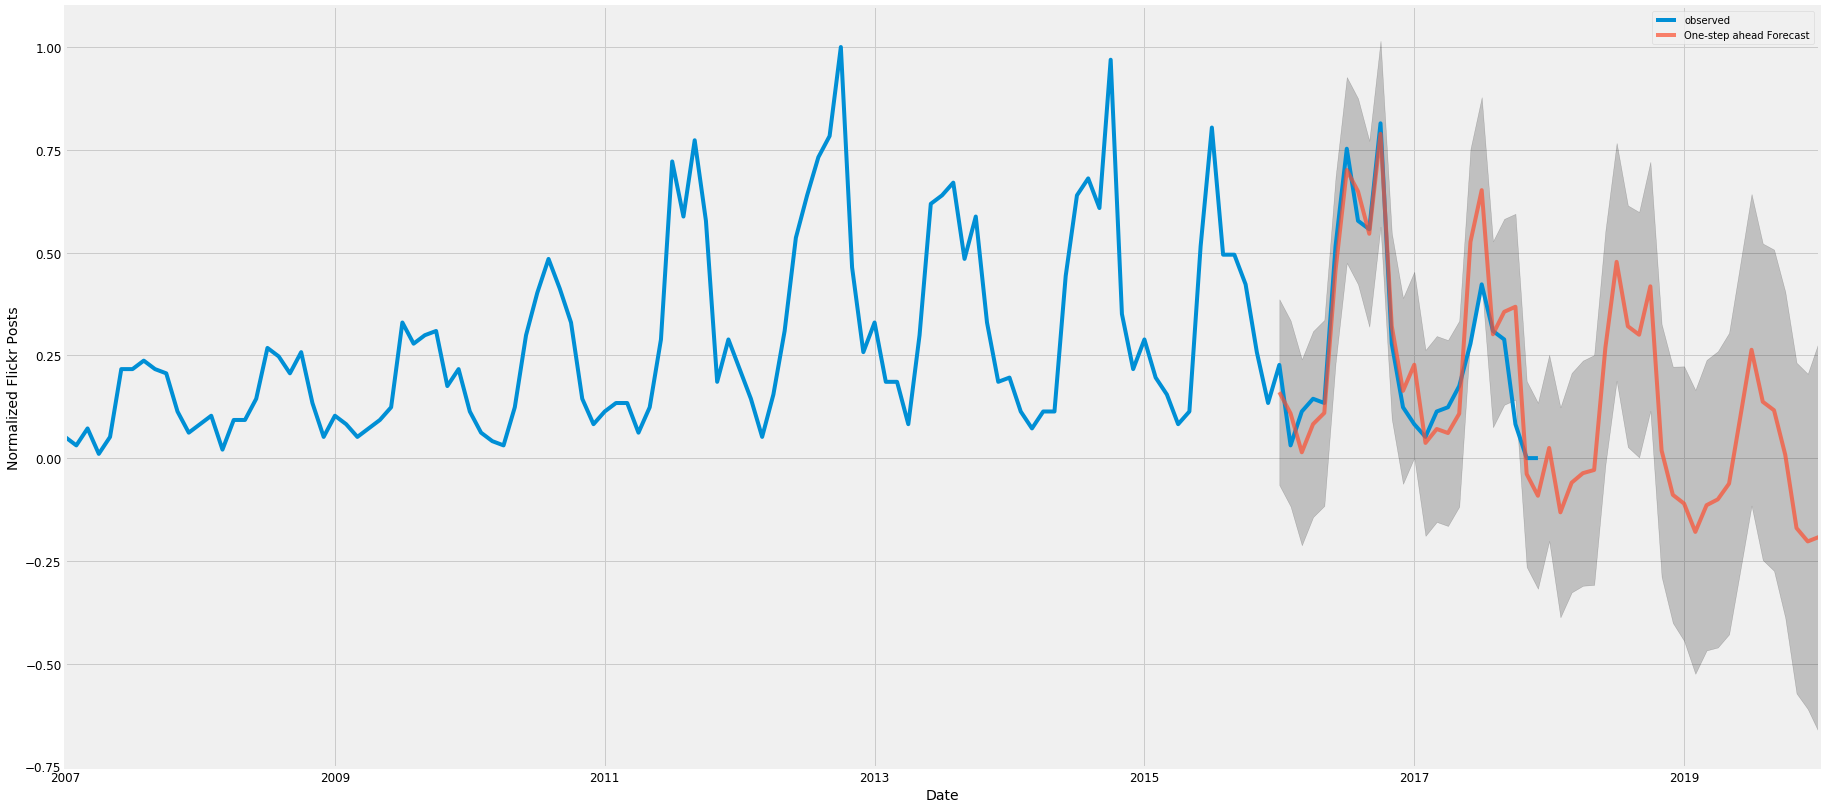

In [62]:
pred_p = p_results.get_prediction(start=pd.to_datetime('2016-01-01'), end=pd.to_datetime('2020-01-01'), dynamic=False)
pred_p_ci = pred_p.conf_int()

fig = matplotlib.pyplot.figure()

ax = p['2006':].plot(label='observed')
pred_p.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(28, 14))
ax.fill_between(pred_p_ci.index,
                pred_p_ci.iloc[:, 0],
                pred_p_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Flickr Posts')
plt.legend()
plt.show()

fig.savefig('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Posts_One_Step_Forecast.png', dpi=fig.dpi)

In [64]:
p_forecasted = pred_p.predicted_mean
p_truth = p['2016-01-01':]
mse_p = ((p_forecasted - p_truth) ** 2).mean()

f = open('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Posts_RMSE.txt','w')
f.write('The Mean Squared Error of our Posts forecasts is {}'.format(round(mse_p, 7)) + '\n' +
'The Root Mean Squared Error of our Posts forecasts is {}'.format(round(np.sqrt(mse_p), 7)))
f.close()

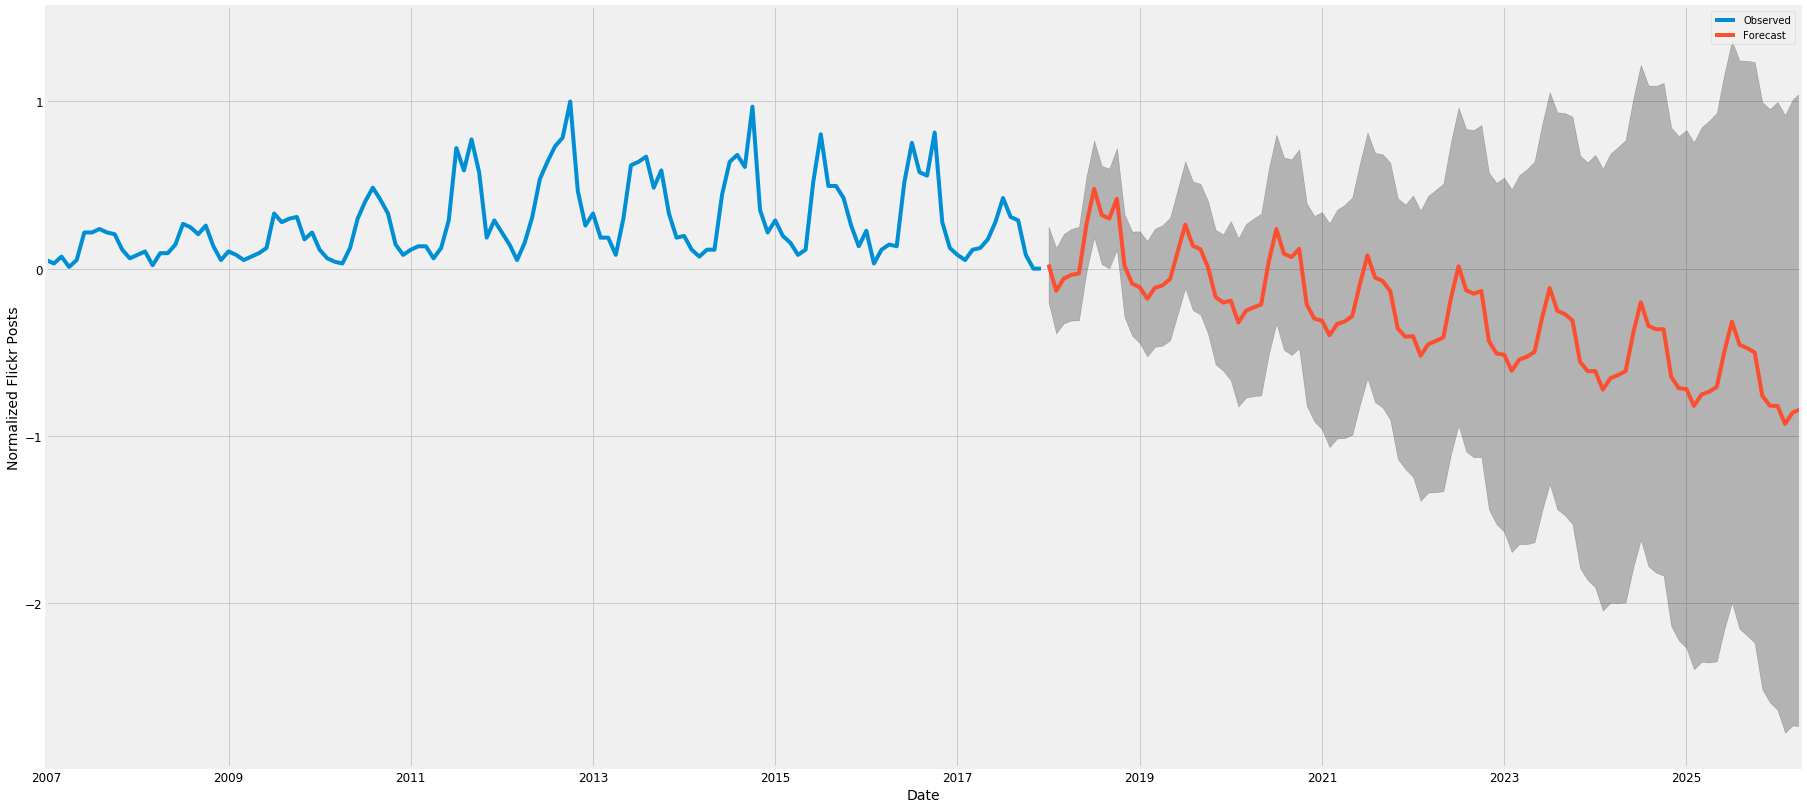

In [68]:
pred_p_uc = p_results.get_forecast(steps=100)
pred_p_ci = pred_p_uc.conf_int()

fig = matplotlib.pyplot.figure()

ax = p.plot(label='Observed', figsize=(28, 14))
pred_p_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_p_ci.index,
                pred_p_ci.iloc[:, 0],
                pred_p_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Flickr Posts')
plt.legend()
plt.show()
fig.savefig('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Posts_OneHundred_Step_Forecast.png', dpi=fig.dpi)

## Combination

In [75]:
df1 = df.reset_index()
df1.head()

,Timestamp,Visits,Posts
0,2007-01-01,0.006458,0.051546
1,2007-02-01,0.004673,0.030928
2,2007-03-01,0.015472,0.072165
3,2007-04-01,0.071844,0.010309
4,2007-05-01,0.165072,0.051546


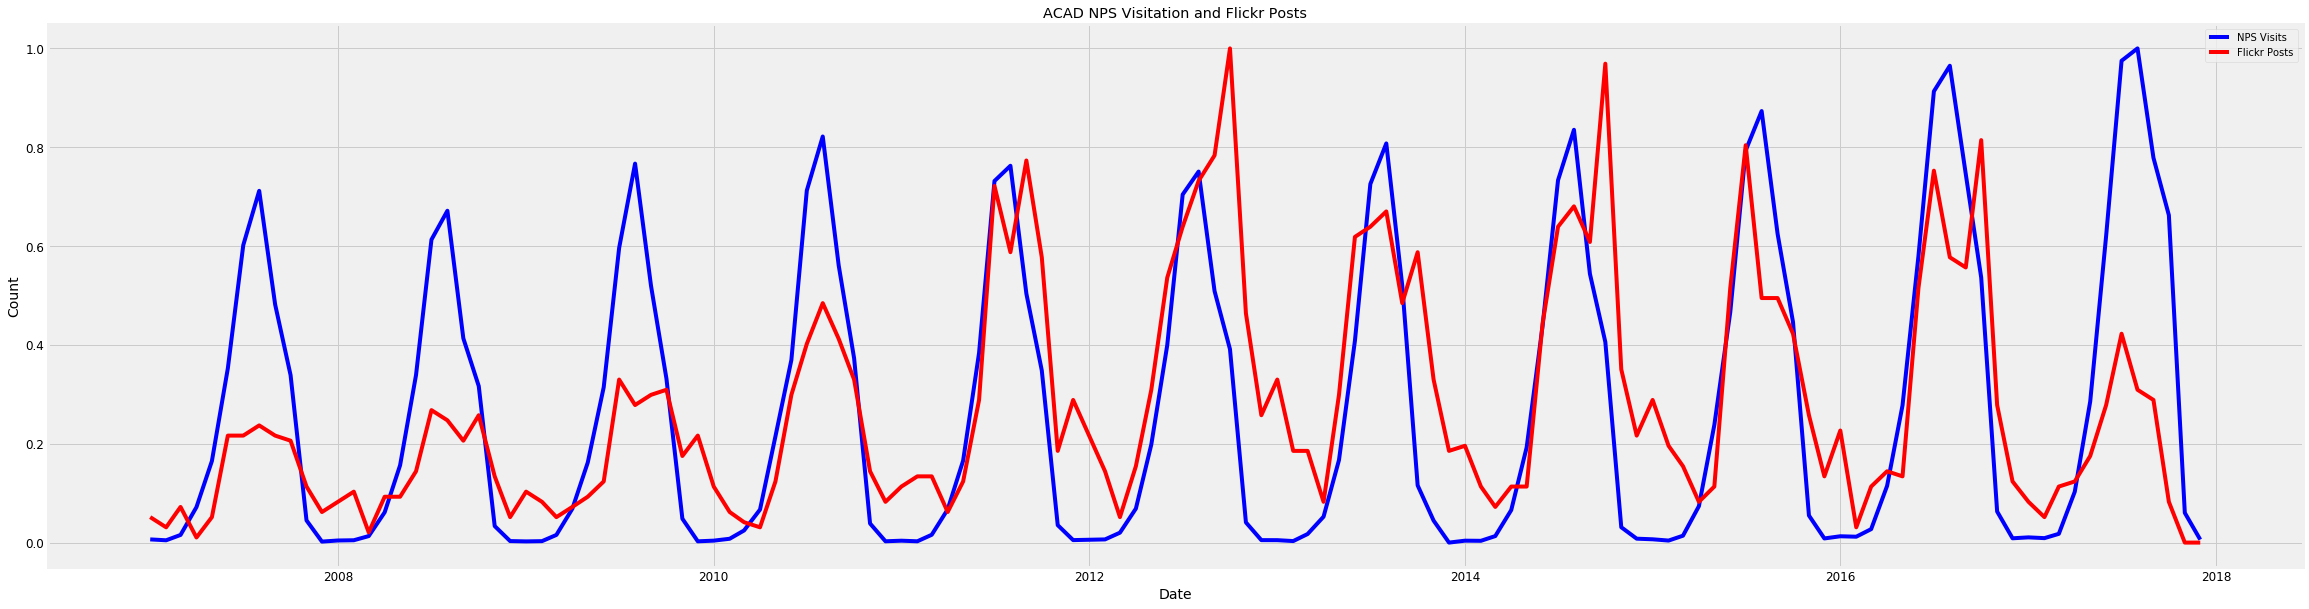

In [81]:
fig = plt.figure(figsize=(36, 10))
plt.plot(df1['Timestamp'], df1['Visits'], 'b-', label = 'NPS Visits')
plt.plot(df1['Timestamp'], df1['Posts'], 'r-', label = 'Flickr Posts')
plt.xlabel('Date'); plt.ylabel('Count'); plt.title('ACAD NPS Visitation and Flickr Posts')
plt.legend();

fig.savefig('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Combo_Plot.png', dpi=fig.dpi)

## Facebook Prophet

In [132]:
from fbprophet import Prophet
df_v = df1.rename(columns={'Timestamp': 'ds', 'Visits': 'y'})
df_v_model = Prophet(interval_width=0.95)
df_v_model.fit(df_v)
df_p = df1.rename(columns={'Timestamp': 'ds', 'Posts': 'y'})
df_p_model = Prophet(interval_width=0.95)
df_p_model.fit(df_p)
df_v_forecast = df_v_model.make_future_dataframe(periods=36, freq='MS')
df_v_forecast = df_v_model.predict(df_v_forecast)
df_p_forecast = df_p_model.make_future_dataframe(periods=36, freq='MS')
df_p_forecast = df_p_model.predict(df_p_forecast)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 432x288 with 0 Axes>

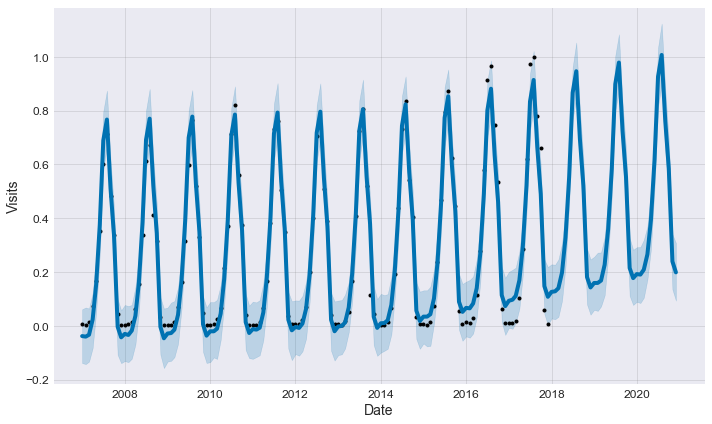

In [143]:
#fig = matplotlib.pyplot.figure()
fig = plt.figure()
df_v_model.plot(df_v_forecast, xlabel = 'Date', ylabel = 'Visits')
#plt.title('ACAD Visitation Forecast');
fig.show()
# fig.savefig('F:\\AIRMA\\PARKS\\' + park + '\\' + park + '_Visits_Prophet_Plot.png')
#fig.savefig(park + '_Visits_Prophet_Plot.png')